In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
pd.set_option('display.max_columns', None)


In [24]:
df_steps = pd.read_csv('../data/raw/steps.csv')

In [25]:
df_steps

,route_id,delivery_id,action,step_order,distance
0,r-shiinc-1011686,t-amabrt-1338732,delivery,20,2.2
1,r-shiinc-1011686,t-amabrt-1338732,pickup,1,0.0
2,r-shiinc-1011686,t-amabrt-1338977,delivery,23,26.8
3,r-shiinc-1011686,t-amabrt-1338977,pickup,7,0.0
4,r-shiinc-1011686,t-amabrt-1339015,delivery,25,1.8
...,...,...,...,...,...
51848519,r-shiinc-1374803,t-amaste-1376624,pickup,44,0.0
51848520,r-shiinc-1374803,t-amaste-1376649,delivery,91,0.8
51848521,r-shiinc-1374803,t-amaste-1376649,pickup,51,0.0
51848522,r-shiinc-1374803,t-lojecd-17238,delivery,65,0.6


In [6]:
df_deliveries = pd.read_csv('../data/raw/deliveries.csv', encoding='latin-1')

In [12]:
df_deliveries

,id,route_id,state,_status,items,total_size,pickupLat,pickupLng,deliveryLat,deliveryLng,pickup_dt,max_pickup_dt,pickup_arrival_dt,pickup_effective_dt,delivery_dt,max_delivery_dt,delivery_arrival_dt,delivery_effective_dt,cost,final_price,distance,shipper_id,distance_charged,distance_route,total_package_price,vehicle_capacity
0,t-amabrt-1338381,r-shiinc-1011719,7,completed,"[{""id"":""SFYBR003431115"",""qty"":1,""name"":""CAIXA""...",2,-19.9618,-44.0285,-19.9268,-44.0977,2022-01-03 12:30:00,2022-01-03 13:30:00,2022-01-03 12:33:56,2022-01-03 14:10:30,2022-01-04 07:30:39,2022-01-04 08:30:39,2022-01-04 11:26:49,2022-01-04 11:29:14,2.94,4.87,11.6,266665.0,0.5,0.5,120.62,2
1,t-amabrt-1338382,r-shiinc-1015749,7,completed,"[{""id"":""SFYBR003431932"",""qty"":1,""name"":""CAIXA""...",2,-19.9618,-44.0285,-19.9304,-43.9361,2022-01-05 15:30:00,2022-01-05 16:30:00,2022-01-05 15:01:16,2022-01-05 15:10:00,2022-01-05 18:48:07,2022-01-05 19:48:07,2022-01-05 20:07:03,2022-01-05 20:10:44,1.95,7.71,12.0,292684.0,0.5,0.5,272.90,2
2,t-amabrt-1338383,r-shiinc-1013679,7,completed,"[{""id"":""SFYBR003431610"",""qty"":1,""name"":""CAIXA""...",2,-19.9618,-44.0285,-19.8080,-43.9787,2022-01-04 17:00:00,2022-01-04 18:00:00,2022-01-04 15:41:10,2022-01-04 15:55:42,2022-01-05 05:22:46,2022-01-05 06:22:46,2022-01-05 18:53:59,2022-01-05 18:54:22,4.05,4.87,24.6,219267.0,0.3,0.3,99.01,2
3,t-amabrt-1338384,r-shiinc-1011705,7,completed,"[{""id"":""SFYBR003438164"",""qty"":1,""name"":""CAIXA""...",2,-19.9618,-44.0285,-19.8146,-43.9768,2022-01-03 13:00:00,2022-01-03 14:00:00,2022-01-03 12:24:33,2022-01-03 14:09:12,2022-01-03 15:45:40,2022-01-03 16:45:40,2022-01-03 15:50:15,2022-01-03 21:31:53,2.99,4.87,23.3,324993.0,0.3,0.3,69.90,2
4,t-amabrt-1338385,r-shiinc-1011717,7,completed,"[{""id"":""SFYBR003431094"",""qty"":1,""name"":""CAIXA""...",2,-19.9618,-44.0285,-19.9729,-43.9701,2022-01-03 13:00:00,2022-01-03 14:00:00,2022-01-03 12:48:33,2022-01-03 14:21:06,2022-01-03 15:17:11,2022-01-03 16:17:11,2022-01-03 15:46:43,2022-01-03 15:47:42,3.19,4.80,10.5,244005.0,0.3,0.3,20.62,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594263,t-wesing-3690,r-shiinc-1198145,7,completed,"[{""id"":""0"",""name"":""Marcia campos"",""size"":4,""qt...",4,-19.9743,-43.9446,-19.9603,-43.9482,2022-04-04 13:00:00,2022-04-04 14:00:00,2022-04-04 13:14:34,2022-04-04 13:25:22,2022-04-04 14:00:00,2022-04-04 15:00:00,2022-04-04 13:39:13,2022-04-04 13:44:14,6.05,12.30,4.0,74788.0,4.0,4.0,NaN,4
594264,t-wesing-3692,r-shiinc-1198145,7,completed,"[{""id"":""0"",""name"":""Viviane de Quadros"",""size"":...",5,-19.9743,-43.9446,-19.9485,-43.9439,2022-04-04 13:00:00,2022-04-04 14:00:00,2022-04-04 13:14:34,2022-04-04 13:25:22,2022-04-04 14:00:02,2022-04-04 15:00:02,2022-04-04 13:50:02,2022-04-04 13:55:30,6.05,12.30,5.5,74788.0,0.0,0.0,NaN,5
594265,t-wesing-3697,r-shiinc-1199512,7,completed,"[{""id"":""0"",""name"":""Allan Costa"",""size"":2,""qty""...",2,-19.9412,-43.9340,-19.9390,-43.9396,2022-04-04 14:45:00,2022-04-04 15:45:00,2022-04-04 14:31:48,2022-04-04 14:36:20,2022-04-04 15:45:01,2022-04-04 16:45:01,2022-04-04 14:45:41,2022-04-04 14:48:20,5.85,12.30,1.2,319781.0,1.7,1.7,NaN,2
594266,t-wesing-3698,r-shiinc-1199512,7,completed,"[{""id"":""0"",""name"":""Lucia Helena Souza de Toled...",5,-19.9412,-43.9340,-19.9355,-43.9267,2022-04-04 14:45:00,2022-04-04 15:45:00,2022-04-04 14:31:48,2022-04-04 14:36:20,2022-04-04 15:45:00,2022-04-04 16:45:00,2022-04-04 15:20:17,2022-04-04 15:21:29,5.85,12.30,2.2,319781.0,2.2,2.2,NaN,5


In [14]:
df_deliveries = df_deliveries[df_deliveries['cost'] > 0]
df_deliveries = df_deliveries[df_deliveries['shipper_id'].notna()]

id                            0
route_id                      0
state                         0
_status                       0
items                         0
total_size                    0
pickupLat                     0
pickupLng                     0
deliveryLat                   0
deliveryLng                   0
pickup_dt                     0
max_pickup_dt                 0
pickup_arrival_dt             1
pickup_effective_dt           0
delivery_dt                   0
max_delivery_dt               0
delivery_arrival_dt         353
delivery_effective_dt         0
cost                          0
final_price                   0
distance                      0
shipper_id                    0
distance_charged              0
distance_route                0
total_package_price      193377
vehicle_capacity              0
dtype: int64

In [8]:
sub_df = df_steps[['route_id', 'delivery_id']]

In [26]:
df_steps = df_steps.drop_duplicates();
df_steps

,route_id,delivery_id,action,step_order,distance
0,r-shiinc-1011686,t-amabrt-1338732,delivery,20,2.2
1,r-shiinc-1011686,t-amabrt-1338732,pickup,1,0.0
2,r-shiinc-1011686,t-amabrt-1338977,delivery,23,26.8
3,r-shiinc-1011686,t-amabrt-1338977,pickup,7,0.0
4,r-shiinc-1011686,t-amabrt-1339015,delivery,25,1.8
...,...,...,...,...,...
51644663,r-shiinc-1273881,t-tagros-2545511,pickup,2,0.0
51644664,r-shiinc-1273881,t-tagros-2548135,delivery,6,1.2
51644665,r-shiinc-1273881,t-tagros-2548135,pickup,1,0.0
51644666,r-shiinc-1273881,t-tagros-2548918,delivery,4,13.8


In [40]:
df_route_shipper = df_deliveries.groupby(['route_id'], as_index=False).agg({ 'shipper_id': 'first', 'cost': 'sum', 'total_size': 'sum'})
df_route_shipper

,route_id,shipper_id,cost,total_size
0,r-shiinc-1010782,168209.0,70.37,32
1,r-shiinc-1010889,16235.0,32.40,19
2,r-shiinc-1010893,352381.0,38.88,17
3,r-shiinc-1010901,333352.0,32.40,16
4,r-shiinc-1010927,243463.0,19.44,5
...,...,...,...,...
18378,r-shiinc-1363667,144345.0,2.99,2
18379,r-shiinc-1365768,243132.0,3.74,2
18380,r-shiinc-1367716,78816.0,2.60,2
18381,r-shiinc-1374791,220320.0,4.23,2


In [29]:
df_route_distance = df_steps.groupby(['route_id'], as_index=False).agg({ 'distance': 'sum', 'delivery_id': 'count'})
df_route_distance = df_route_distance.rename(columns={'delivery_id': 'deliveries'})
df_route_distance['deliveries'] = df_route_distance['deliveries'] / 2
df_route_distance


,route_id,distance,deliveries
0,r-shiinc-1010782,41.6,18.0
1,r-shiinc-1010889,37.0,17.0
2,r-shiinc-1010893,22.6,12.0
3,r-shiinc-1010901,25.7,11.0
4,r-shiinc-1010927,16.5,17.0
...,...,...,...
18381,r-shiinc-1363667,45.0,58.0
18382,r-shiinc-1365768,57.2,39.0
18383,r-shiinc-1367716,52.5,60.0
18384,r-shiinc-1374791,81.6,50.0


In [42]:
df_merged = pd.merge(df_route_shipper, df_route_distance, on='route_id')
df_merged

,route_id,shipper_id,cost,total_size,distance,deliveries
0,r-shiinc-1010782,168209.0,70.37,32,41.6,18.0
1,r-shiinc-1010889,16235.0,32.40,19,37.0,17.0
2,r-shiinc-1010893,352381.0,38.88,17,22.6,12.0
3,r-shiinc-1010901,333352.0,32.40,16,25.7,11.0
4,r-shiinc-1010927,243463.0,19.44,5,16.5,17.0
...,...,...,...,...,...,...
18378,r-shiinc-1363667,144345.0,2.99,2,45.0,58.0
18379,r-shiinc-1365768,243132.0,3.74,2,57.2,39.0
18380,r-shiinc-1367716,78816.0,2.60,2,52.5,60.0
18381,r-shiinc-1374791,220320.0,4.23,2,81.6,50.0


In [53]:
df_grouped = df_merged.groupby(['shipper_id'], as_index=False).agg({ 'distance': 'mean', 'cost': 'mean', 'deliveries': 'mean', 'total_size': 'mean'})
df_grouped['shipper_id'] = df_grouped['shipper_id'].astype(int)
df_grouped

,shipper_id,distance,cost,deliveries,total_size
0,238,22.699048,111.739000,23.542857,67.057143
1,984,32.432414,58.381631,8.172414,22.868966
2,3134,31.177778,70.111944,9.000000,18.666667
3,6356,44.600000,183.680000,65.000000,128.000000
4,6995,28.400000,91.000000,38.000000,70.000000
...,...,...,...,...,...
1182,413154,10.100000,20.711500,2.000000,2.000000
1183,413381,42.866667,80.634167,15.666667,34.666667
1184,413409,53.700000,1.950000,60.000000,2.000000
1185,414095,36.600000,93.780000,32.000000,36.000000


In [97]:
df_shipper = pd.read_csv('../data/raw/shippers.csv')
df_shipper = df_shipper[['id', 'deliveries_completed', 'age']]
df_shipper

,id,deliveries_completed,age
0,238,6470,44
1,984,3157,36
2,3134,196,36
3,6356,64,36
4,6995,38,36
...,...,...,...
1209,413154,12,37
1210,413381,102,36
1211,413409,410,46
1212,414095,1253,26


In [103]:
df_shipper['age'].describe()

count    1214.000000
mean       36.247941
std         9.298138
min        19.000000
25%        29.000000
50%        36.000000
75%        42.000000
max        76.000000
Name: age, dtype: float64

In [98]:
df_final = pd.merge(df_grouped, df_shipper, left_on='shipper_id', right_on='id')
df_final.drop(['id'], axis=1, inplace=True)

In [99]:
df_final.corr().style.background_gradient(cmap='coolwarm')

,shipper_id,distance,cost,deliveries,total_size,deliveries_completed,age
shipper_id,1.000000,0.068030,-0.051476,-0.012777,-0.037056,-0.261761,-0.147096
distance,0.068030,1.000000,0.616549,0.430075,0.362487,0.082897,-0.031903
cost,-0.051476,0.616549,1.000000,0.807094,0.844490,0.295178,-0.010648
deliveries,-0.012777,0.430075,0.807094,1.000000,0.962858,0.247035,-0.018753
total_size,-0.037056,0.362487,0.844490,0.962858,1.000000,0.257080,-0.000826
deliveries_completed,-0.261761,0.082897,0.295178,0.247035,0.257080,1.000000,0.065004
age,-0.147096,-0.031903,-0.010648,-0.018753,-0.000826,0.065004,1.000000


In [100]:
X = df_final.iloc[:, 1:].values


In [101]:
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [102]:
X_norm 


array([[-1.12814987, -0.23390063, -0.50292347,  0.00353237,  1.7227029 ,
         0.83406526],
       [-0.67310313, -1.17193177, -1.26030637, -1.15220113,  0.61914526,
        -0.02667662],
       [-0.73175889, -0.96571097, -1.21952683, -1.26211147, -0.36716147,
        -0.02667662],
       ...,
       [ 0.32118247, -2.16400892,  1.29351246, -1.69802501, -0.29587824,
         1.04925072],
       [-0.47826339, -0.54962274, -0.08619539, -0.80876138, -0.01507562,
        -1.10260396],
       [ 0.67649174, -1.40982002,  0.40655741, -0.96569026, -0.2745599 ,
        -0.56464029]])

In [107]:
clusters = np.arange(2, 10)
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inercias.append(kmeans.inertia_)

<AxesSubplot:xlabel='k', ylabel='inertia'>

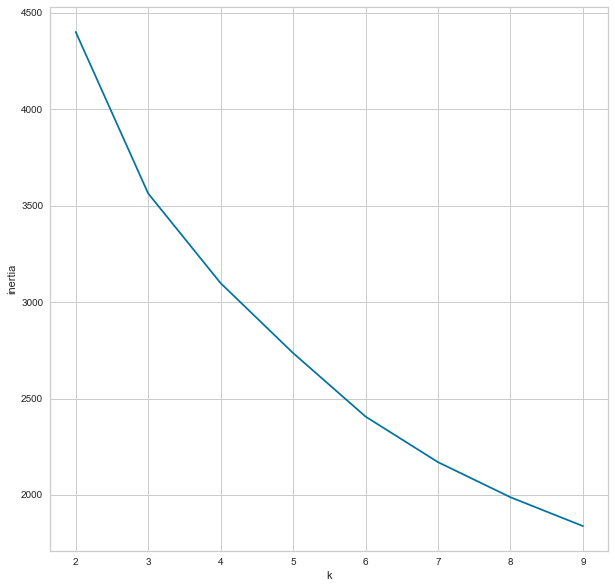

In [108]:
evaluation = pd.DataFrame({'k': clusters, 'inertia': inercias})
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(x='k', y='inertia', data=evaluation)

In [113]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_norm)

KMeans(n_clusters=6, random_state=0)

In [114]:
kmeans.cluster_centers_

array([[ 0.1690173 ,  1.08221036,  1.02634993,  1.05351809,  3.70585895,
         0.17595637],
       [-0.93593858, -1.26004201, -1.24784941, -1.2379147 , -0.30578059,
        -0.17570966],
       [ 0.0591185 , -0.20826644, -0.21483341, -0.24915487, -0.25239729,
        -0.53842678],
       [ 1.61023579,  1.1654347 ,  0.48245774,  0.42911932, -0.03653351,
        -0.24913186],
       [ 0.07771085,  0.7843271 ,  1.17825303,  1.189313  , -0.16607231,
        -0.02704134],
       [-0.14880789, -0.35900844, -0.44672428, -0.38379496, -0.07848421,
         1.51689235]])

In [115]:
df_final['cluster'] = kmeans.labels_
df_final['cluster'].value_counts()

4    295
1    283
2    275
5    153
3    148
0     60
Name: cluster, dtype: int64

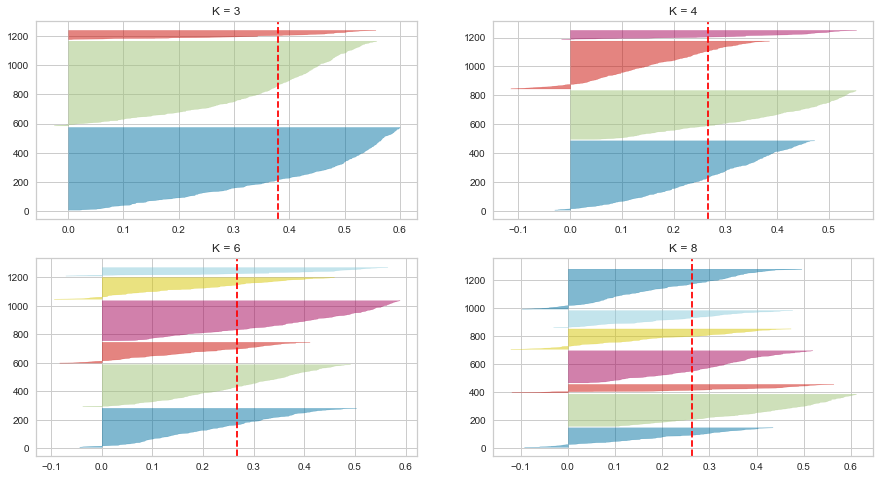

In [116]:
posible_k = [3, 4 , 6, 8]
fig, axs = plt.subplots(2, 2, figsize=(15,8))
for i, k in enumerate(posible_k):
    km = KMeans(n_clusters=k, random_state=37)
    q, mod = divmod(i, 2)
    ax = axs[q][mod]
    ax.set_title("K = {}".format(k))
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax)
    visualizer.fit(X_norm)

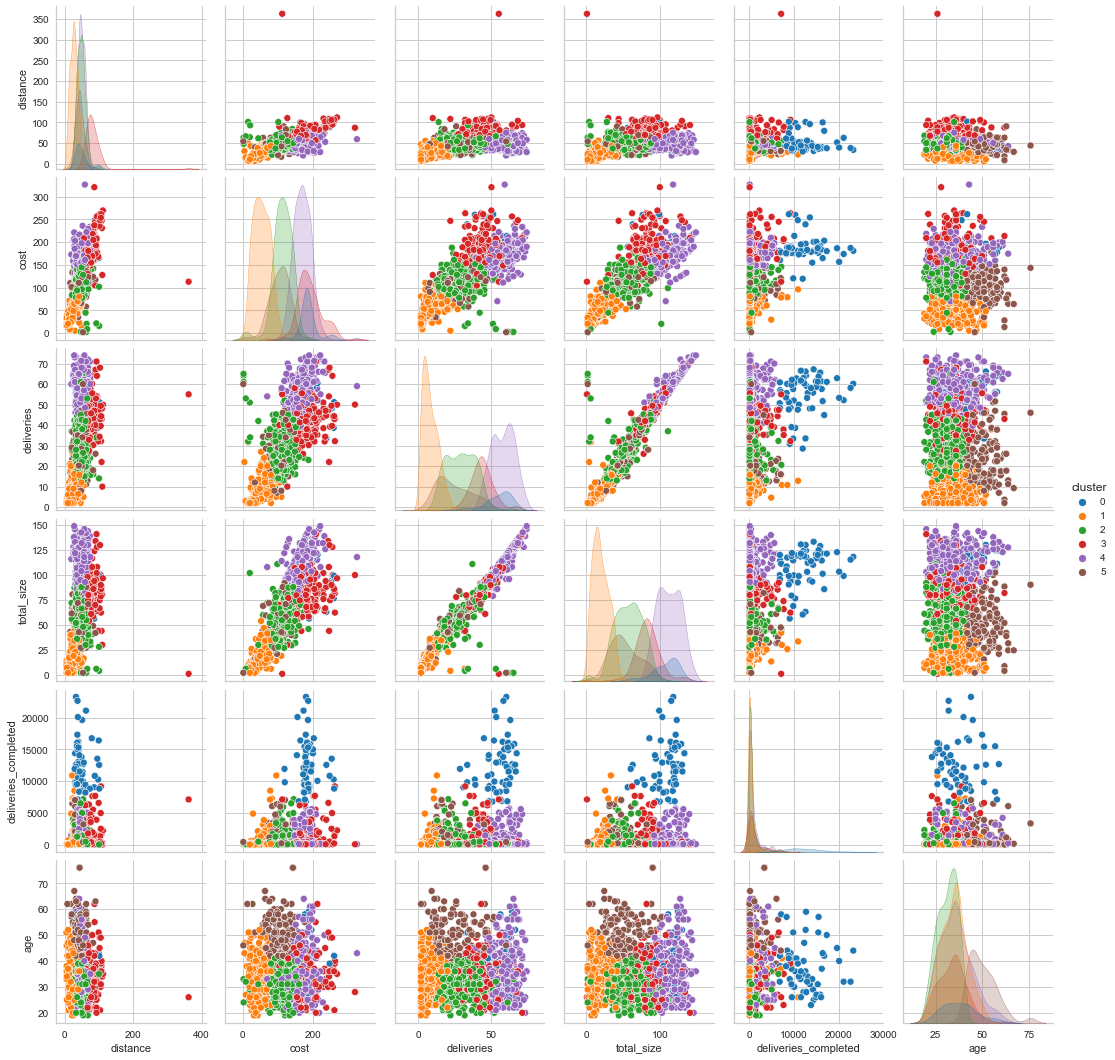

In [119]:
sns.pairplot(df_final.iloc[:, 1:], hue='cluster', palette='tab10')